# Intro

Source: 
- https://www.kaggle.com/code/carlmcbrideellis/time-series-a-simple-moving-average-ma-model
- https://www.kaggle.com/code/carlmcbrideellis/lstm-time-series-stock-price-prediction-fail/notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [2]:
%load_ext autoreload
%autoreload 2
from helper_functions import epa_taiwan_data_pipeline

In [3]:
year = 2018
site_name = "Banqiao"
columns = ["SiteEngName","PM2.5","AMB_TEMP","CH4",'CO',"NMHC","read_time"]

pm25_df = epa_taiwan_data_pipeline.import_epa_data(site_name=site_name, year=year)
pm25_df = epa_taiwan_data_pipeline.standardize_df(pm25_df)

In [4]:
pm25_df.head()

,siteengname,pm2.5,amb_temp,ch4,co,nmhc,read_time
1,Banqiao,20.0,16.1,1.9,0.37,0.07,2018-01-01 00:00:00
77,Banqiao,19.0,16.2,1.9,0.37,0.08,2018-01-01 01:00:00
153,Banqiao,17.0,16.3,1.9,0.31,0.05,2018-01-01 02:00:00
229,Banqiao,17.0,16.3,1.9,0.28,0.05,2018-01-01 03:00:00
305,Banqiao,16.0,16.5,1.9,0.27,0.05,2018-01-01 04:00:00


## Rolling average
We shall now create a rolling average, with a window size of 10, using `pandas.DataFrame.rolling`

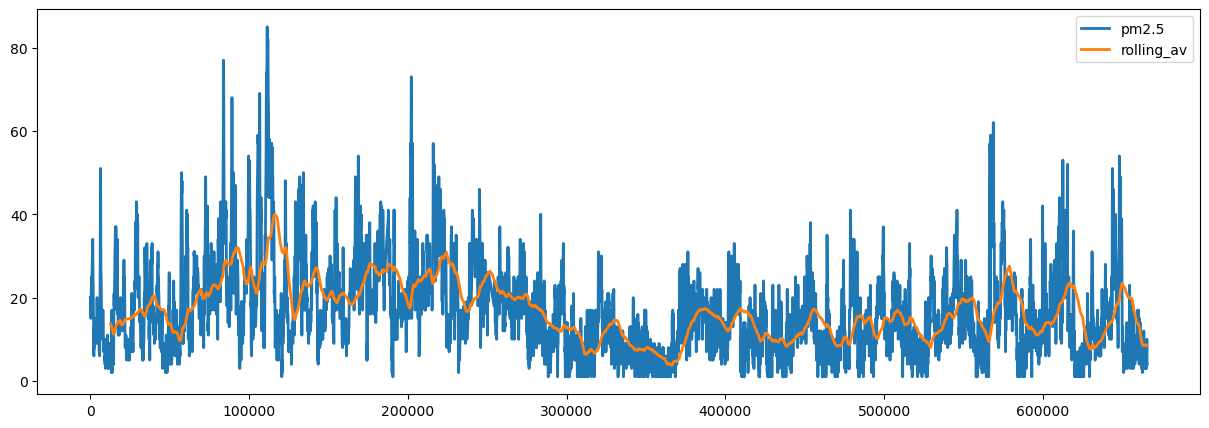

In [8]:
pm25_df['rolling_av'] = pm25_df['pm2.5'].rolling(24*7).mean() # 24 hours x 7 days

# take a look
pm25_df[['pm2.5','rolling_av']].plot(lw=2);

# Moving average model
To create our moving average model we shall use ARIMA from statsmodels. This is a composite of:
- autoregressive model, AR($p$)
- integration model, I($d$)
- moving average model, MA($q$)

which is passed via the tuple `order(p,d,q)`. Here we shall use again a window of  `q=10`:

In [9]:
# from statsmodels.tsa.arima.model import ARIMA
# ARMA_model = ARIMA(endog=IBEX_values['Close'], order=(0, 0, 10))
# results = ARMA_model.fit()
# print(results.summary())


# Predictions
We shall now look at the predictions made by our moving average model

In [10]:
# start_date = '2020-06-12'
# end_date   = '2021-06-04'
# IBEX_values['forecast'] = results.predict(start=start_date, end=end_date)

In [11]:
# IBEX_values[['Close','rolling_av','forecast']].tail(10)

In [12]:
# IBEX_values[['Close','rolling_av','forecast']].plot(lw=2);

# Model Assessment